In [80]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import json
%matplotlib inline

In [96]:

def plotVS(df1,df2,xlabel,ylabel):
    # Plot model vs model
    labels1 = df1[0].columns.values
    avarages1 = []
    errors1 = []
    c=['k','b','r','g']
    for label in labels1:
        average = np.mean([df[label] for df in df1], axis=0)
        avarages1.append(average)
        error = np.std([df[label] for df in df1], axis=0)
        errors1.append(error)
    labels2 = df2[0].columns.values
    avarages2 = []
    errors2 = []
    c=['k','b','r','g']
    for label in labels2:
        average = np.mean([df[label] for df in df2], axis=0)
        avarages2.append(average)
        error = np.std([df[label] for df in df2], axis=0)
        errors2.append(error)
    x = range(1, len(avarages1[0]) + 1)
    for i in range (len(avarages1)):
        plt.figure(figsize=(10, 6))
        plt.plot(x, avarages1[i], 'b-', label=xlabel)
        plt.plot(x, avarages2[i], 'r-', label=ylabel)
        plt.xlabel("Number of images")
        plt.ylabel("Seconds")
        plt.title("Browser VS Headless " + labels1[i] + " calculation times (S)")
        plt.legend()
        plt.grid(True)
        plt.show()
    
def plotDatasetTimes(df,xlabel,ylabel,title):
    
    labels = df[0].columns.values
    avarages = []
    errors = []
    c=['k','b','r','g']
    for label in labels:
        average = np.mean([df[label] for df in df], axis=0)
        avarages.append(average)
        error = np.std([df[label] for df in df], axis=0)
        errors.append(error)

    x = range(1, len(avarages[0]) + 1)
    # Plot all columns
    plt.figure(figsize=(10, 6))
    i = 0
    for column in df[0].columns:
        plt.errorbar(x, avarages[i], yerr=errors[i], fmt='o', capsize=5, mfc=c[i], mec=c[i], ecolor=c[i])
        # Connect the points with a line
        plt.plot(x, avarages[i], label=column, color=c[i])
        i += 1

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def getBrowserArrayTimes():
    browserTimesArray = []
    for i in range(1, 11):
        file_path = './data/resnet-wasm-browser (' + str(i) + ').json'
    
        with open(file_path) as file:
            data = json.load(file)
        
        RWB_Times = pd.DataFrame(data)
        RWB_Times_s = RWB_Times / 1000
        browserTimesArray.append(RWB_Times_s)
    
    return browserTimesArray

def getHeadlessArrayTimes():
    headlessTimesArray = []
    for i in range(1,11):
        './data/'
        file_path = './data/resnet-wasm-headless' + str(i) + '.json'
        with open(file_path) as file:
            data = json.load(file)
        
        RWB_Times = pd.DataFrame(data)
        RWB_Times_s = RWB_Times / 1000.0
        headlessTimesArray.append(RWB_Times_s)
    return headlessTimesArray

In [87]:
browserTimesArray = getBrowserArrayTimes()
headlessTimesArray = getHeadlessArrayTimes()

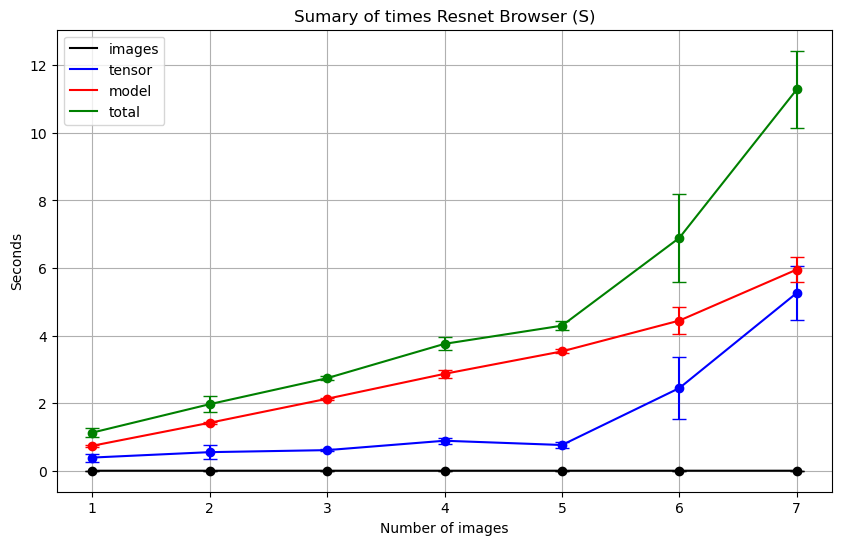

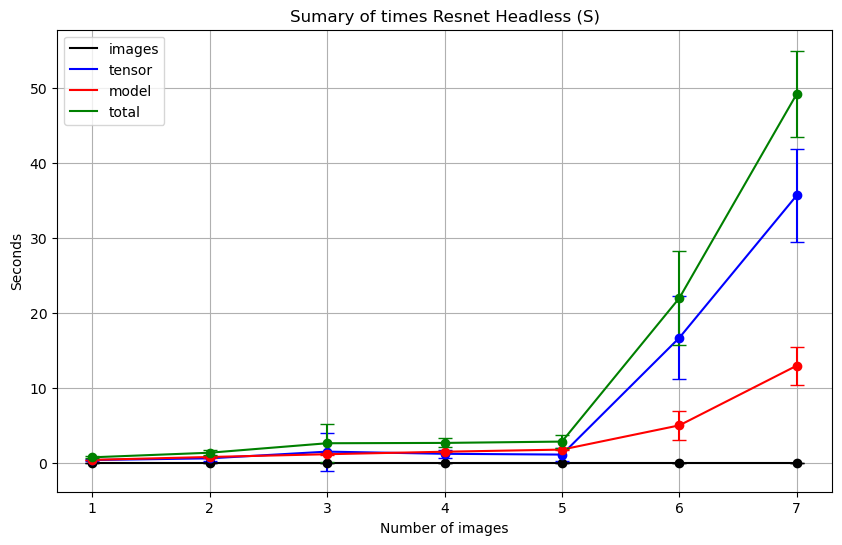

In [89]:
plotDatasetTimes(browserTimesArray,"Number of images", "Seconds", "Sumary of times Resnet Browser (S)")
plotDatasetTimes(headlessTimesArray,"Number of images", "Seconds", "Sumary of times Resnet Headless (S)")

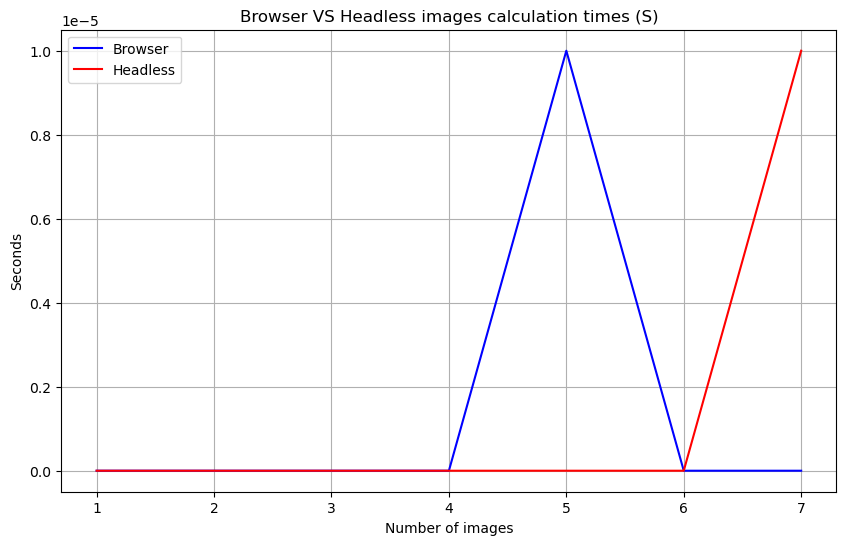

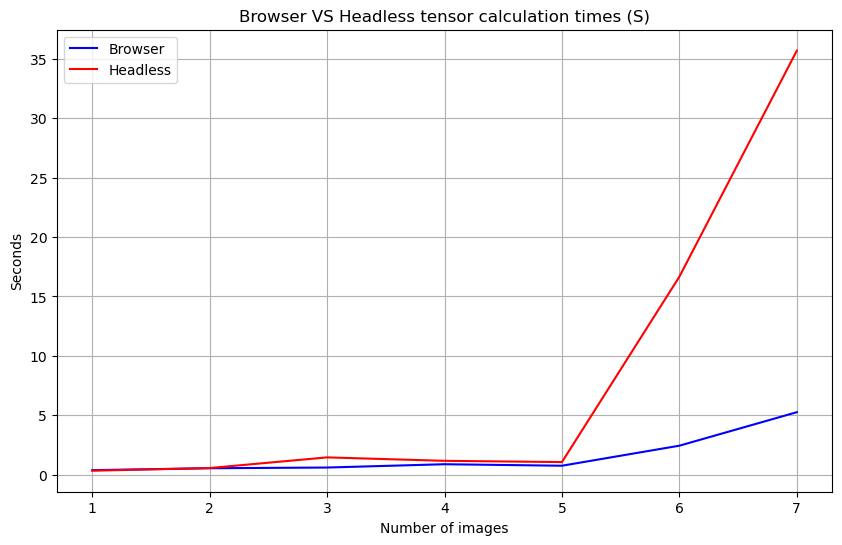

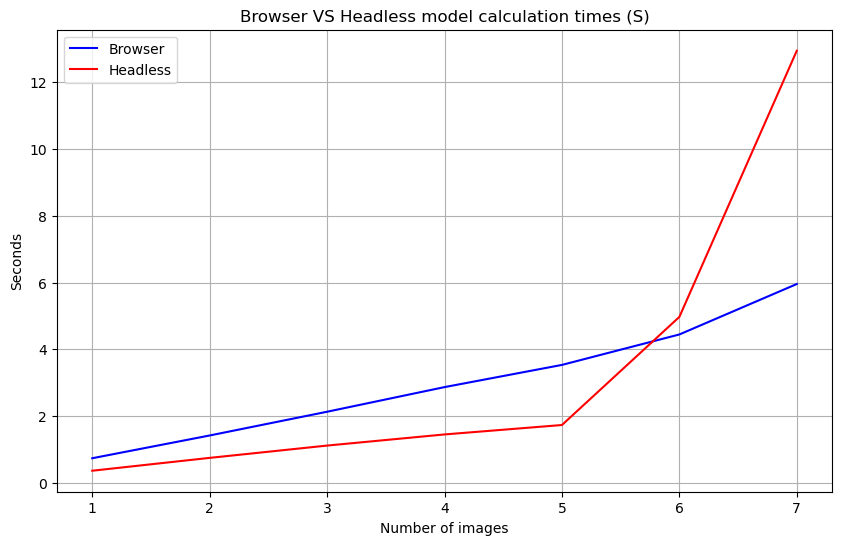

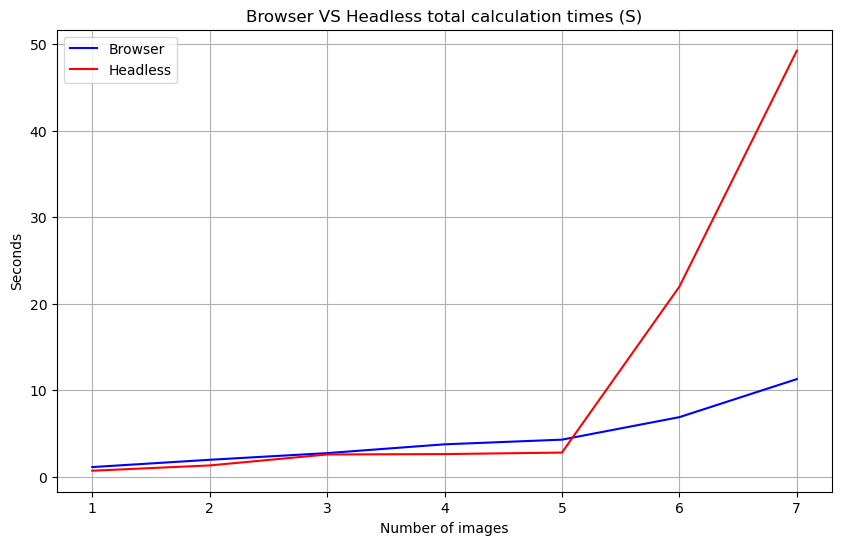

In [97]:
plotVS(browserTimesArray,headlessTimesArray,"Browser","Headless")
